In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None 

In [4]:
df_read = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2009-2010")

In [6]:
df = df_read.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
df["Description"].nunique()

4681

In [10]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64

In [11]:
df.groupby("Description").agg({"Quantity" : "sum"}).head()

,Quantity
Description,
21494,-720
22467,-2
22719,2
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690


In [12]:
df.groupby("Description").agg({"Quantity" : "sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [14]:
df["Invoice"].nunique()

28816

In [15]:
df["Customer ID"].nunique()

4383

In [17]:
df[df["Invoice"].str.contains("C", na=False)].shape   #.str.contains("C", na=False) ifadesi, seçilen "Invoice" sütununun her bir hücresinde "C" karakterini içeren satırları bulur. na=False parametresi, bu işlem sırasında NaN (eksik) değerleri göz ardı etmeyi sağlar.

(10206, 8)

In [19]:
df = df[~df["Invoice"].str.contains("C", na=False)] #C harfini içermeyenleri aldık df ye

In [20]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [21]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [22]:
df.sort_values("Price", ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09000,NaN,United Kingdom,25111.09000
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33000,NaN,United Kingdom,13541.33000
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50000,12918.00000,United Kingdom,10953.50000
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50000,NaN,United Kingdom,10953.50000
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80000,NaN,United Kingdom,10468.80000


In [23]:
df["Country"].value_counts()

United Kingdom          477058
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

In [24]:
df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).astype(int).head()

,TotalPrice
Country,
United Kingdom,8709203
EIRE,380977
Netherlands,268786
Germany,202395
France,147211


In [25]:
### DATA PREPARATİON

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(407695, 9)

In [29]:
df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695,13,96,1,2,5,12,19152
Price,407695,3,34,0,1,1,3,10953
Customer ID,407695,15368,1679,12346,13997,15321,16812,18287
TotalPrice,407695,21,77,0,4,11,19,15818


In [30]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T.astype(int)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,407695,13,96,1,1,1,1,2,5,12,24,36,144,19152
Price,407695,3,34,0,0,0,0,1,1,3,6,8,14,10953
Customer ID,407695,15368,1679,12346,12435,12731,13044,13997,15321,16812,17706,17913,18196,18287
TotalPrice,407695,21,77,0,0,1,2,4,11,19,35,67,201,15818


In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [32]:
#RFM

In [33]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [34]:
df["Tenure"] = df["InvoiceDate"]

In [35]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Tenure
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000,2009-12-01 07:45:00


In [36]:
df.groupby('Customer ID').agg({'Invoice': "count"}).head()

,Invoice
Customer ID,
12346.00000,33
12347.00000,71
12348.00000,20
12349.00000,102
12351.00000,21


In [37]:
df.groupby('Customer ID').agg({'Quantity': "mean"}).head()

,Quantity
Customer ID,
12346.00000,2.12121
12347.00000,11.66197
12348.00000,18.65000
12349.00000,9.73529
12351.00000,12.42857


In [38]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days}).head()

,InvoiceDate
Customer ID,
12346.00000,165
12347.00000,3
12348.00000,74
12349.00000,43
12351.00000,11


In [39]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                               'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).astype(int).head()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.00000,165,361,33,372
12347.00000,3,40,71,1323
12348.00000,74,74,20,222
12349.00000,43,225,102,2671
12351.00000,11,11,21,300


In [40]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).astype(int)

In [41]:
rfm.head()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.00000,165,361,11,372
12347.00000,3,40,2,1323
12348.00000,74,74,1,222
12349.00000,43,225,3,2671
12351.00000,11,11,1,300


In [42]:
rfm.columns

Index(['InvoiceDate', 'Tenure', 'Invoice', 'TotalPrice'], dtype='object')

In [43]:
rfm.shape

(4314, 4)

In [46]:
rfm.columns = ['Recency', 'Tenure', 'Frequency','Monetary']
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]
rfm.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346.00000,165,361,11,372
12347.00000,3,40,2,1323
12348.00000,74,74,1,222
12349.00000,43,225,3,2671
12351.00000,11,11,1,300


In [47]:
rfm.columns

Index(['Recency', 'Tenure', 'Frequency', 'Monetary'], dtype='object')

In [52]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [58]:
#pd.qcut işlevi, verileri belirli bir sayıda eşit boyutlu gruba böler. Bu durumda, rfm veri çerçevesinin "Recency" sütununu 5 eşit büyüklükte gruba böler.
#5 argümanı, veriyi 5 eşit büyüklükte gruba bölmek istediğimizi belirtir.
#labels=[5, 4, 3, 2, 1] ifadesi, her bir gruba atanan etiketleri belirtir. Burada, en son alışveriş yapan müşterileri 5 olarak etiketlerken, en uzun süredir alışveriş yapmayanları 1 olarak etiketliyoruz.

In [53]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [54]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [55]:
rfm["TenureScore"] = pd.qcut(rfm['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [56]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5
12347.00000,3,40,2,1323,5,2,4,1
12348.00000,74,74,1,222,2,1,1,1
12349.00000,43,225,3,2671,3,3,5,3
12351.00000,11,11,1,300,5,1,2,1


In [59]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [60]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252
12347.00000,3,40,2,1323,5,2,4,1,524
12348.00000,74,74,1,222,2,1,1,1,211
12349.00000,43,225,3,2671,3,3,5,3,335
12351.00000,11,11,1,300,5,1,2,1,512


In [62]:
rfm[rfm["RFM_SCORE"] == "555"].head() #zekice oldu

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12415.00000,11,163,7,19543,5,5,5,2,555
12431.00000,9,329,13,4370,5,5,5,4,555
12471.00000,10,368,49,20139,5,5,5,5,555
12472.00000,5,361,13,11308,5,5,5,5,555
12474.00000,14,302,13,5048,5,5,5,4,555


In [63]:
rfm['RecencyScore'].value_counts()

5    906
1    855
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [64]:
rfm['RFM_SCORE'].value_counts()

555    350
111    201
455    153
121    146
112    107
233     98
444     95
554     94
122     94
544     93
344     93
211     89
333     78
244     76
355     75
221     73
212     72
311     71
443     65
312     65
433     63
543     58
454     56
321     56
322     55
422     53
232     53
222     52
343     52
533     50
421     50
133     49
445     49
334     49
223     47
332     45
234     44
245     44
243     44
434     40
432     40
132     39
323     38
423     38
411     38
113     37
545     36
345     35
412     35
255     33
313     32
354     31
532     31
534     28
131     27
522     25
521     24
254     23
144     23
511     22
231     22
335     22
123     22
512     21
134     20
242     19
213     18
124     17
143     17
542     16
442     16
424     15
431     15
324     14
331     13
523     12
553     11
142     11
114     10
413      9
531      9
314      9
235      9
342      8
524      8
214      8
155      8
453      7
253      7
224      7
135      7

In [65]:
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}


In [66]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,25
12347.00000,3,40,2,1323,5,2,4,1,524,52
12348.00000,74,74,1,222,2,1,1,1,211,21
12349.00000,43,225,3,2671,3,3,5,3,335,33
12351.00000,11,11,1,300,5,1,2,1,512,51


In [67]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()

Customer ID    4314
dtype: int64

In [68]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers


In [69]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency         Monetary      
                         mean count      mean count       mean count
Segment                                                             
About_to_Sleep       53.81924   343   1.20117   343  440.82799   343
At_Risk             152.15876   611   3.07365   611 1188.37152   611
Cant_Loose          124.11688    77   9.11688    77 4099.00000    77
Champions             7.11916   663  12.55354   663 6851.76621   663
Hibernating         213.88571  1015   1.12611  1015  403.51034  1015
Loyal_Customers      36.28706   742   6.83019   742 2745.58895   742
Need_Attention       53.26570   207   2.44928   207 1059.84541   207
New_Customers         8.58000    50   1.00000    50  385.70000    50
Potential_Loyalists  18.79304   517   2.01741   517  729.00967   517
Promising            25.74713    87   1.00000    87  366.55172    87

In [70]:
rfm[rfm["Segment"] == "Need_Attention"].head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention
12369.00000,49,277,3,1791,3,3,4,3,334,Need_Attention
12371.00000,45,281,3,2179,3,3,5,3,335,Need_Attention
12374.00000,57,224,3,2246,3,3,5,3,335,Need_Attention
12389.00000,38,291,3,1433,3,3,4,4,334,Need_Attention


In [71]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"] 

In [72]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


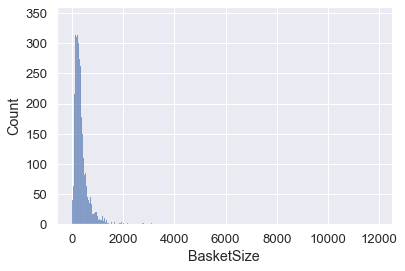

In [73]:
sns.set_theme(font_scale=1.2) 
sns.histplot(x=rfm["BasketSize"]);

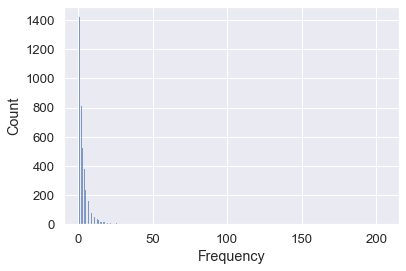

In [75]:
sns.set_theme(font_scale=1.2) 
sns.histplot(x=rfm["Frequency"]);

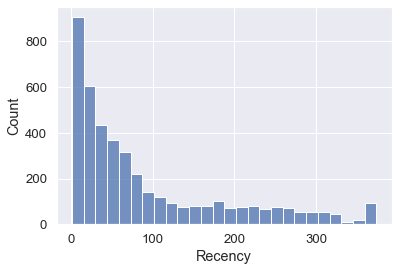

In [76]:
sns.set_theme(font_scale=1.2) 
sns.histplot(x=rfm["Recency"]);

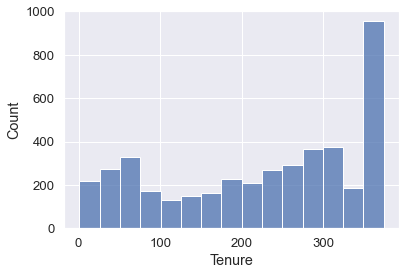

In [77]:
sns.set_theme(font_scale=1.2) 
sns.histplot(x=rfm["Tenure"]);

# CLUSTER-K-MEANS

In [78]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [79]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [80]:
rfm.to_csv("rfm_cluster_data.csv")

In [81]:
rfm= pd.read_csv("rfm_cluster_data.csv")
rfm.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
0,12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
1,12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
2,12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
3,12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
4,12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [82]:
rfm.shape

(4312, 12)

In [83]:
rfm.index=rfm["Customer ID"]
rfm.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,,
12346.00000,12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [84]:
rfm.drop(columns='Customer ID', inplace=True)

In [85]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [86]:
rfm.shape

(4312, 11)

In [87]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore", "TenureScore"]]

In [88]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,
12346.00000,2,5,2,5
12347.00000,5,2,4,1
12348.00000,2,1,1,1
12349.00000,3,3,5,3
12351.00000,5,1,2,1


In [89]:
segment_data.shape

(4312, 4)

In [90]:
segment_data.dtypes

RecencyScore      int64
FrequencyScore    int64
MonetaryScore     int64
TenureScore       int64
dtype: object

In [91]:
#  Optimal Number of Clusters

In [92]:
range(2, 12)

range(2, 12)

In [93]:
K = range(2, 12)

In [94]:
for i in K:
    print(i)

2
3
4
5
6
7
8
9
10
11


In [95]:
kmeans = KMeans(n_clusters=4).fit(segment_data)

In [96]:
kmeans.labels_

array([0, 3, 1, ..., 1, 0, 2])

In [97]:
print(kmeans.inertia_)

11511.300285738826


19120.741887245516
14078.514598211726
11510.714151779785
9689.522648591459
8694.244975983434
8020.517655906242
7366.701377994543
6875.088619854896
6362.172136357136
6187.895076093619


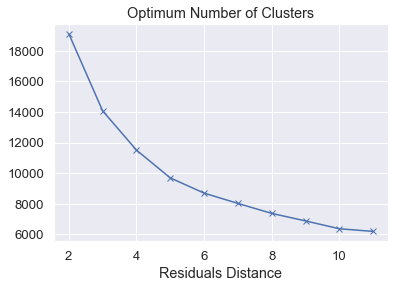

In [98]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()    

#Inertia measures how well a dataset was clustered by K-Means. 
#It is calculated by measuring the distance between each data point and its centroid, 
#squaring this distance, and summing these squares across one cluster. 

In [99]:
kmeans = KMeans(n_clusters=5).fit(segment_data)

In [100]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [101]:
kmeans.labels_

array([4, 0, 3, ..., 1, 4, 0])

In [102]:
pd.options.mode.chained_assignment = None 

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

In [103]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.00000,2,5,2,5,2
12347.00000,5,2,4,1,4
12348.00000,2,1,1,1,1
12349.00000,3,3,5,3,2
12351.00000,5,1,2,1,1


In [104]:
segment_data["clusters"].value_counts()

0    1057
3     942
2     904
1     784
4     625
Name: clusters, dtype: int64

In [105]:
kmeans = KMeans(n_clusters=6).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()


2    942
1    904
0    726
5    625
3    594
4    521
Name: clusters, dtype: int64

In [108]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,361,11,372,2,5,2,5,252,Cant_Loose,33.81818
12347.00000,3,40,2,1323,5,2,4,1,524,Potential_Loyalists,661.50000
12348.00000,74,74,1,222,2,1,1,1,211,Hibernating,222.00000
12349.00000,43,225,3,2671,3,3,5,3,335,Need_Attention,890.33333
12351.00000,11,11,1,300,5,1,2,1,512,New_Customers,300.00000


In [109]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.00000,2,5,2,5,0
12347.00000,5,2,4,1,1
12348.00000,2,1,1,1,6
12349.00000,3,3,5,3,4
12351.00000,5,1,2,1,3


In [110]:
rfm[["Segment"]].head()

,Segment
Customer ID,
12346.00000,Cant_Loose
12347.00000,Potential_Loyalists
12348.00000,Hibernating
12349.00000,Need_Attention
12351.00000,New_Customers


In [111]:
rfm[["Segment"]].nunique()

Segment    10
dtype: int64

In [113]:
segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [114]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,,
12346.00000,Cant_Loose,2,5,2,5,0
12347.00000,Potential_Loyalists,5,2,4,1,1
12348.00000,Hibernating,2,1,1,1,6
12349.00000,Need_Attention,3,3,5,3,4
12351.00000,New_Customers,5,1,2,1,3


In [115]:
segmentation.columns

Index(['Segment', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'TenureScore', 'clusters'], dtype='object')

In [116]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4,5,6
Segment,,,,,,,
About_to_Sleep,11,5,0,315,6,2,4
At_Risk,245,2,0,0,227,55,82
Cant_Loose,8,0,0,0,69,0,0
Champions,0,178,485,0,0,0,0
Hibernating,11,0,0,3,30,525,446
Loyal_Customers,59,159,434,0,90,0,0
Need_Attention,67,65,0,30,41,0,4
New_Customers,0,1,0,49,0,0,0
Potential_Loyalists,34,214,23,246,0,0,0


#  Hierarchical-Clustering

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [118]:
segment_data1 = segment_data.drop(['clusters','MonetaryScore'], axis=1)

In [119]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00000,2,5,5
12347.00000,5,2,1
12348.00000,2,1,1
12349.00000,3,3,3
12351.00000,5,1,1


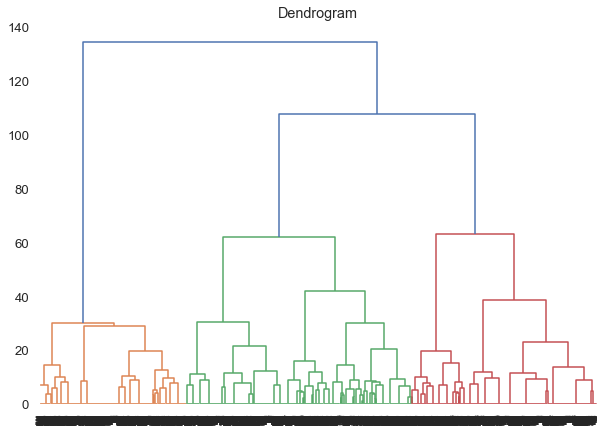

In [120]:
#Dendrogram plot
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(segment_data1, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method);

In [121]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00000,2,5,5
12347.00000,5,2,1
12348.00000,2,1,1
12349.00000,3,3,3
12351.00000,5,1,1


In [126]:
cluster_ea = AgglomerativeClustering(n_clusters=6, linkage='ward',affinity='euclidean')